# Getting the most solar power for your dollar
## Exploratory Data Analysis
### Zachary Brown

Now that the raw data has been wrangled into a useful dataframe it is time to explore the data and identify correlations and trends that may be important for modeling. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
print(os.getcwd())
os.chdir(r"..\data\interim")
print(os.getcwd())

C:\Users\Zachary Brown\Documents\GitHub\Solar-Panel-Capstone\notebooks
C:\Users\Zachary Brown\Documents\GitHub\Solar-Panel-Capstone\data\interim


In [3]:
data = pd.read_csv('wrangled_data.csv', index_col=0, low_memory=False)
data.shape

(208257, 57)

In [4]:
data.head()

,data_provider_1,system_id_1,installation_date,system_size_dc,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,tracking,...,state_MA,state_MD,state_MN,state_NH,state_NM,state_NY,state_RI,state_TX,state_UT,state_WI
108019,Arizona Public Service,107903,2020-06-17,5.760,17488.26,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
108020,Arizona Public Service,107904,2020-06-17,8.750,22631.00,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
108142,Arizona Public Service,108026,2020-06-19,4.725,18972.00,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
108175,Arizona Public Service,108059,2020-06-22,3.550,9900.00,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
108233,Arizona Public Service,108117,2020-06-23,5.850,20475.00,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.columns

Index(['data_provider_1', 'system_id_1', 'installation_date', 'system_size_dc',
       'total_installed_price', 'rebate_or_grant', 'customer_segment',
       'expansion_system', 'multiple_phase_system', 'tracking',
       'ground_mounted', 'zip_code', 'city', 'utility_service_territory',
       'third_party_owned', 'installer_name', 'self_installed', 'azimuth_1',
       'tilt_1', 'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'additional_modules', 'technology_module_1',
       'bipv_module_1', 'bifacial_module_1', 'nameplate_capacity_module_1',
       'efficiency_module_1', 'inverter_manufacturer_1', 'inverter_model_1',
       'inverter_quantity_1', 'additional_inverters', 'micro_inverter_1',
       'solar_storage_hybrid_inverter_1', 'built_in_meter_inverter_1',
       'dc_optimizer', 'inverter_loading_ratio', 'date_of_battery_install',
       'year', 'month', 'price_per_kw', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DE', 'state_FL', 'state_M

In [6]:
col = data.columns.to_series().groupby(data.dtypes).groups
print(col)

{int64: ['expansion_system', 'multiple_phase_system', 'tracking', 'ground_mounted', 'third_party_owned', 'self_installed', 'module_quantity_1', 'additional_modules', 'bipv_module_1', 'bifacial_module_1', 'additional_inverters', 'micro_inverter_1', 'solar_storage_hybrid_inverter_1', 'built_in_meter_inverter_1', 'dc_optimizer', 'month', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DE', 'state_FL', 'state_MA', 'state_MD', 'state_MN', 'state_NH', 'state_NM', 'state_NY', 'state_RI', 'state_TX', 'state_UT', 'state_WI'], float64: ['system_size_dc', 'total_installed_price', 'rebate_or_grant', 'azimuth_1', 'tilt_1', 'nameplate_capacity_module_1', 'efficiency_module_1', 'inverter_quantity_1', 'inverter_loading_ratio', 'year', 'price_per_kw'], object: ['data_provider_1', 'system_id_1', 'installation_date', 'customer_segment', 'zip_code', 'city', 'utility_service_territory', 'installer_name', 'module_manufacturer_1', 'module_model_1', 'technology_module_1', 'inverter_manufacturer_1', 'in

In [7]:
# Year was read in as a float, so I'm going to change that to integer

data['year'] = data['year'].astype(int)

One useful tool to quickly identify a difference in distributions is the empirical cumulative distribution function (ECDF). I'd like to determine whether there are any clear differences in prices per KW in TX versus the rest of the US, so I will first create a function to quickly produce an EDCF for a given column. Then I'll create two new dataframes, one with just TX data, the other with all other states. Then I'll overlay the ECDFs of both to compare. 

In [8]:
def ecdf(column):
    n = len(column)

    # x-data for the ECDF: x
    x = np.sort(column)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [9]:
# Creating the two new dataframes
tx = data[data['state_TX'] == 1]
not_tx = data[data['state_TX'] == 0]

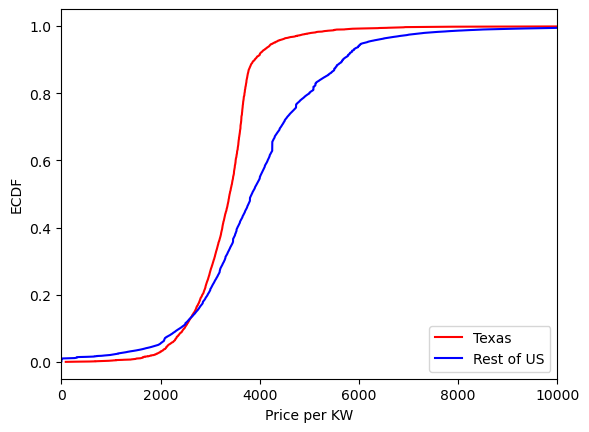

In [10]:
# Plotting the two ECDFs against one another

tx_x, tx_y = ecdf(tx['price_per_kw'])
us_x, us_y = ecdf(not_tx['price_per_kw'])

plt.plot(tx_x, tx_y, color='r')
plt.plot(us_x, us_y, color='b')
plt.xlim(0,10000)
plt.xlabel('Price per KW')
plt.ylabel('ECDF')
plt.legend(['Texas', 'Rest of US'], loc='lower right')
plt.show()

Very interesting! Although the rest of the US has some installations that are more cost efficient than those in Texas, the Texas installations as a whole tend to be more cost efficient than the rest of the country. It seems likely that this will factor into the model later on. Just to confirm whether these results are significantly different, I'll run a two-tailed t-test with the null hypothesis that the mean price per KW of Texas installations and the rest of the US are the same. Before performing the t-test I need to confirm that the data are normally distributed, so I'll perform Shapiro-Wilk tests for normality first. If those results are greater than 0.05 the data is assumed to be normal and I can proceed with the t-test.

In [11]:
scipy.stats.shapiro(tx['price_per_kw'])

C:\Users\Zachary Brown\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.4929770827293396, pvalue=0.0)

In [12]:
scipy.stats.shapiro(not_tx['price_per_kw'])

ShapiroResult(statistic=0.07287067174911499, pvalue=0.0)

Ok, both sets of data pass the Shapiro-Wilk test, so now I'll run the t-test.

In [13]:
scipy.stats.ttest_ind(tx['price_per_kw'], not_tx['price_per_kw'])

Ttest_indResult(statistic=-8.326852184618529, pvalue=8.35145154071985e-17)

Ok, our t-test confirms that there is a real difference in average cost efficiency between Texas and the rest of the US. That's good to know! I'll keep an eye out for that to show up in the model I generate later.

It seems very possible that pricing may vary throughout the year given seasonal changes in weather. For example one might expect an increase in installations, and hence an increase in price, during the winter or spring so that the panels are ready in time for summer. I'll prepare a series of boxplots of the price per KW broken down by month to get a quick look at whether there is any month to month effect.

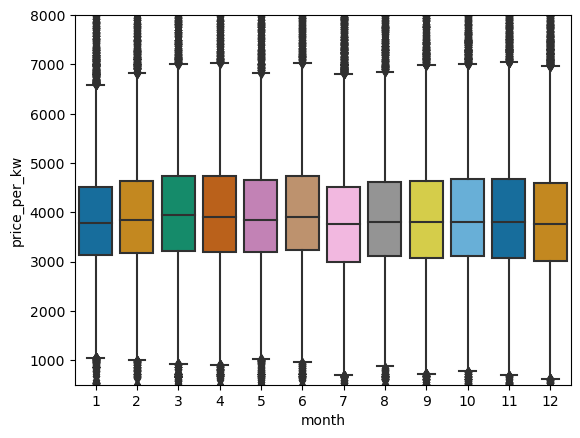

In [14]:
sns.boxplot(x='month', y='price_per_kw', data=data, palette='colorblind')
plt.ylim(500, 8000)
plt.show()

These really don't look different based on the distributions of the data, so I won't dig into this much more right now.

Instead, I want to check for quick correlations in the categorical columns such as 'expansion_system', 'multiple_phase_system', etc. To do so I'll create a loop to automatically make box plots for each.

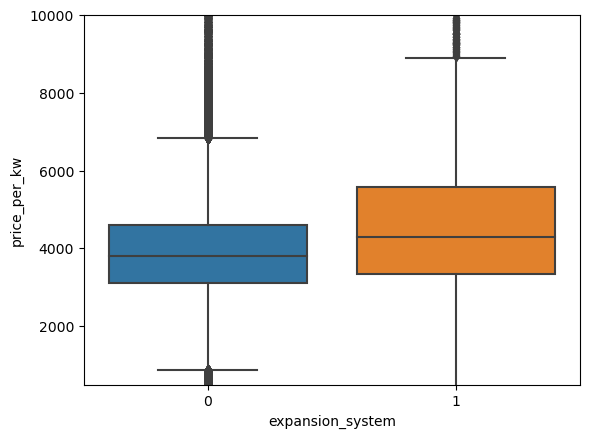

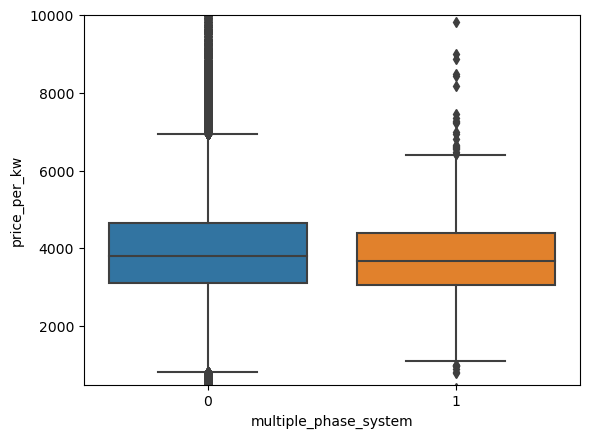

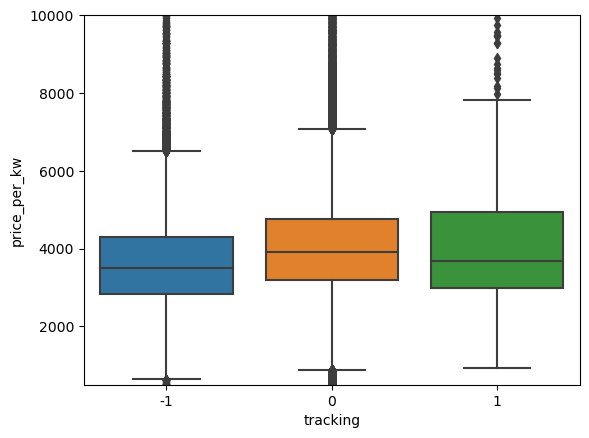

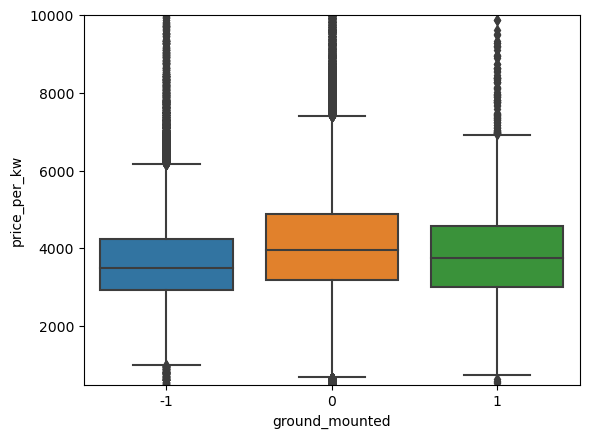

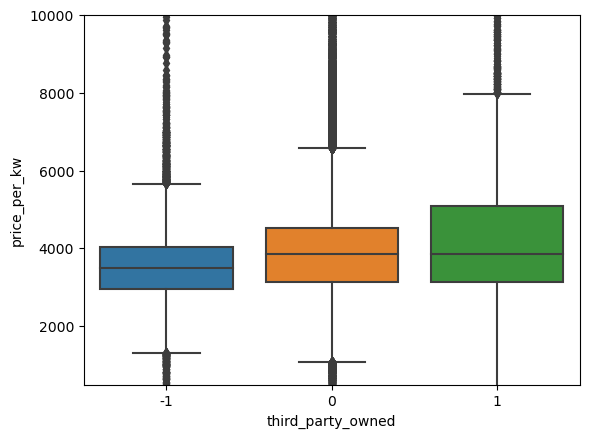

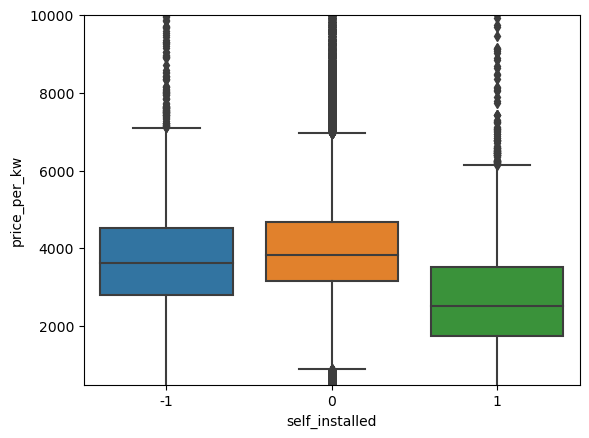

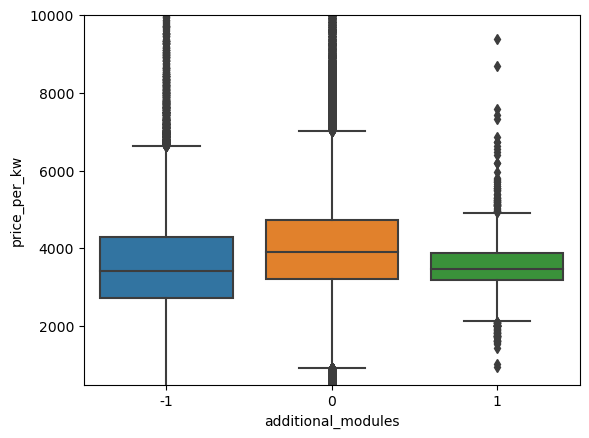

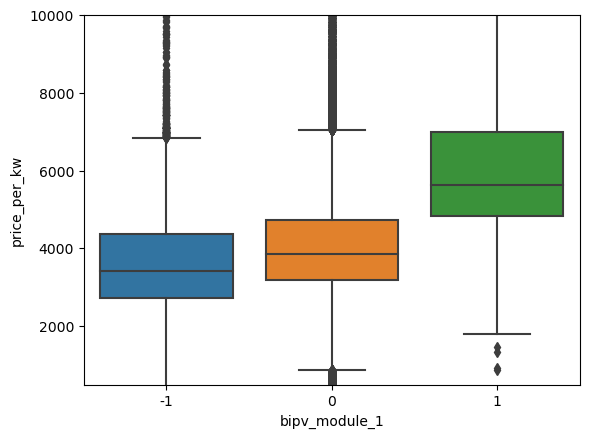

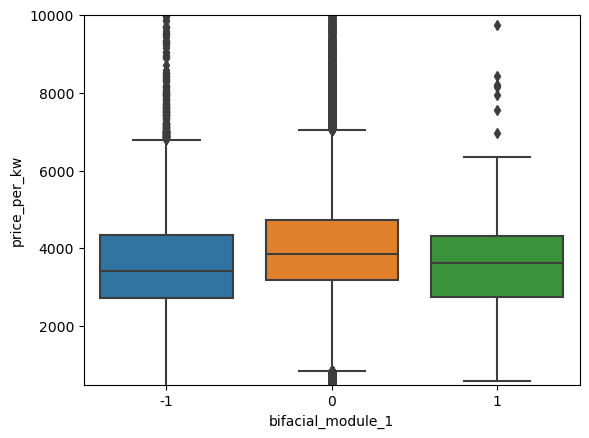

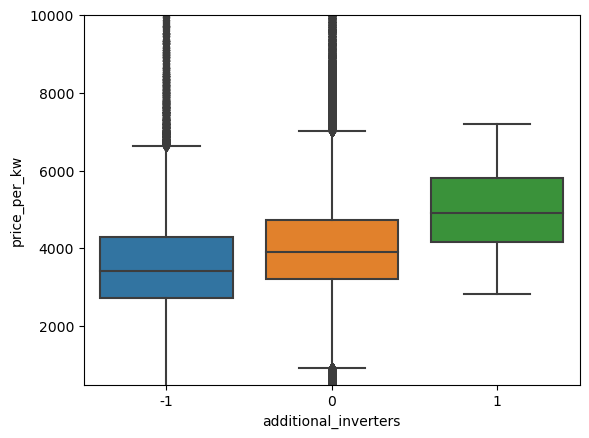

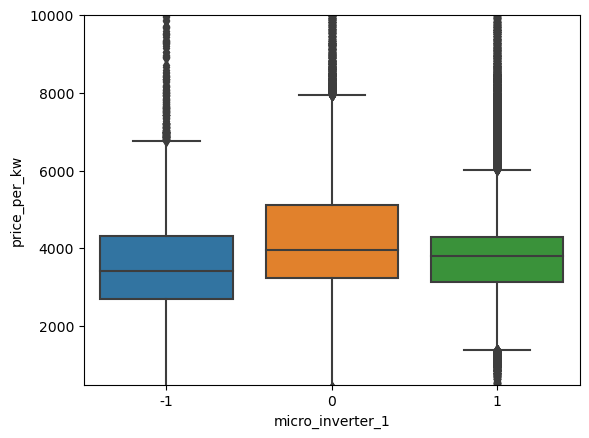

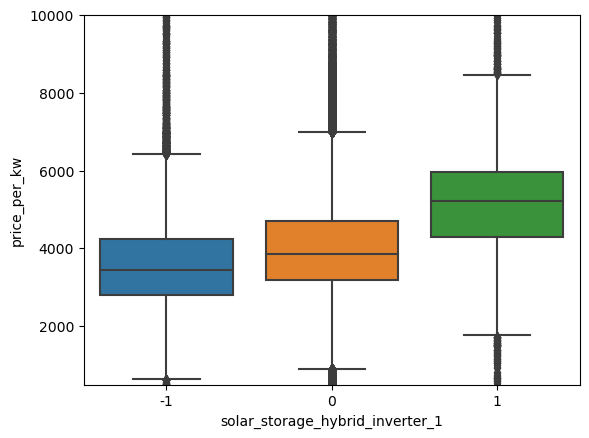

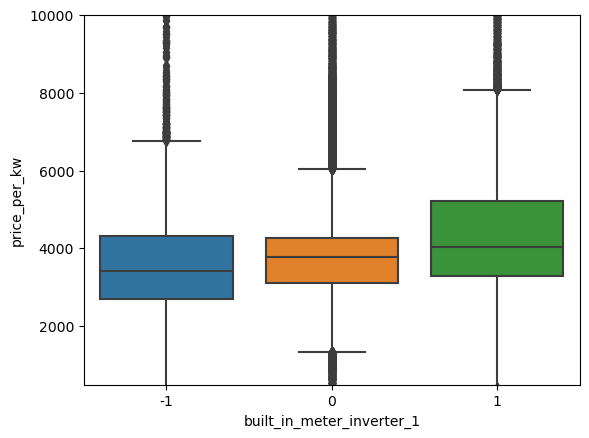

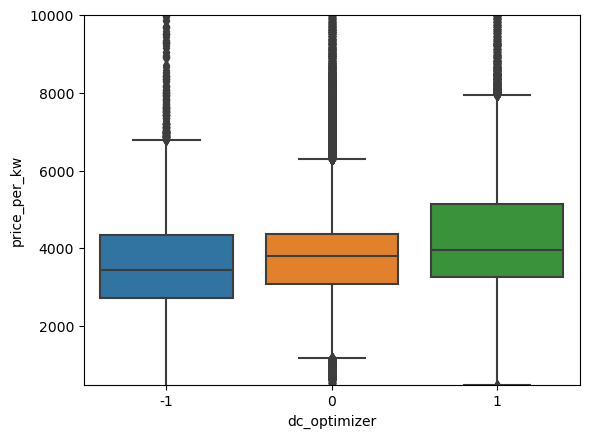

In [15]:
for col in data.columns:
    if data.dtypes[col] == 'int64' and 'state' not in col and 2 not in data[col].unique():
        sns.boxplot(x=col, y='price_per_kw', data=data)
        plt.ylim(500, 10000)
        plt.show()    

While there aren't any plots that show an obvious dramatic difference between their yes (1) and no (0) values, 'self_installed' and 'additional_modules' appear to improve cost efficiency, while 'bipv_module_1', 'additional_inverters', and 'solar_storage_hybrid_inverter_1' all appear to reduce cost efficiency. These may prove important to model development.

I'll go through each of those columns, remove the missing data, split the dataframes by the response to the property of interest, and then perform t-tests to identify whether the mean price per KW is different based on that property.

In [16]:
# self_installed
si_non_null = data[data['self_installed'] != -1]
si_yes = si_non_null[si_non_null['self_installed'] == 1]
si_no = si_non_null[si_non_null['self_installed'] == 0]
print(scipy.stats.ttest_ind(si_yes['price_per_kw'], si_no['price_per_kw']))

Ttest_indResult(statistic=-20.20552291201188, pvalue=1.0841329261436902e-90)


In [17]:
# additional_modules

am_non_null = data[data['additional_modules'] != -1]
am_yes = am_non_null[am_non_null['additional_modules'] == 1]
am_no = am_non_null[am_non_null['additional_modules'] == 0]
print(scipy.stats.ttest_ind(am_yes['price_per_kw'], am_no['price_per_kw']))

Ttest_indResult(statistic=-8.461379495644366, pvalue=2.6628389496148042e-17)


In [18]:
# bipv_module_1 - BIPV stands for building integrated photovoltaic, where the solar panels are designed to blend in with 
# the rest of the building design.

bm1_non_null = data[data['bipv_module_1'] != -1]
bm1_yes = bm1_non_null[bm1_non_null['bipv_module_1'] == 1]
bm1_no = bm1_non_null[bm1_non_null['bipv_module_1'] == 0]
print(scipy.stats.ttest_ind(bm1_yes['price_per_kw'], bm1_no['price_per_kw']))

Ttest_indResult(statistic=12.564814058724114, pvalue=3.410581063393746e-36)


In [19]:
# additional_inverters

ai_non_null = data[data['additional_inverters'] != -1]
ai_yes = ai_non_null[ai_non_null['additional_inverters'] == 1]
ai_no = ai_non_null[ai_non_null['additional_inverters'] == 0]
print(scipy.stats.ttest_ind(ai_yes['price_per_kw'], ai_no['price_per_kw']))

Ttest_indResult(statistic=3.499958896111896, pvalue=0.0004654487524666703)


In [20]:
# solar_storage_hybrid_inverter_1

sshi1_non_null = data[data['solar_storage_hybrid_inverter_1'] != -1]
sshi1_yes = sshi1_non_null[sshi1_non_null['solar_storage_hybrid_inverter_1'] == 1]
sshi1_no = sshi1_non_null[sshi1_non_null['solar_storage_hybrid_inverter_1'] == 0]
print(scipy.stats.ttest_ind(sshi1_yes['price_per_kw'], sshi1_no['price_per_kw']))

Ttest_indResult(statistic=25.927625655684743, pvalue=6.254555956094055e-148)


Great, all of these properties do appear to significantly impact the cost efficiency of the installation as I predicted based on the boxplots. 

Now I want to look for any correlations between the continuous variables and price per KW to see if those play any role here. I'm going to limit the y-axis to the 99.95th percentile of the data to cut out potential outliers which may hide the shape of the bulk data.

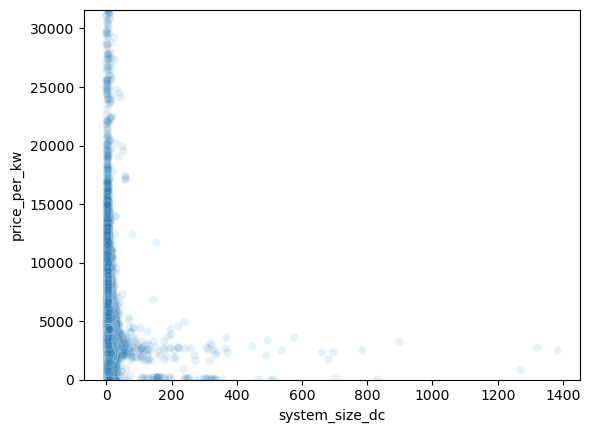

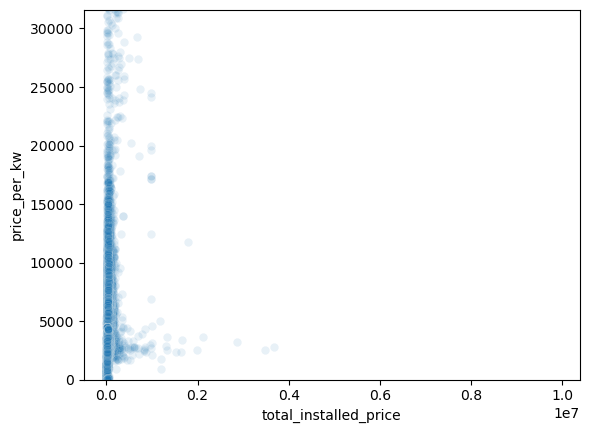

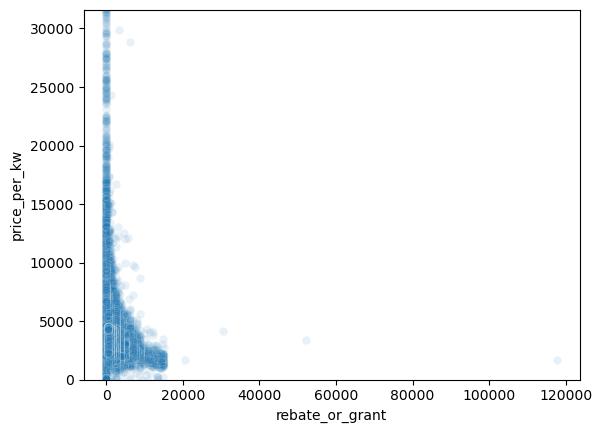

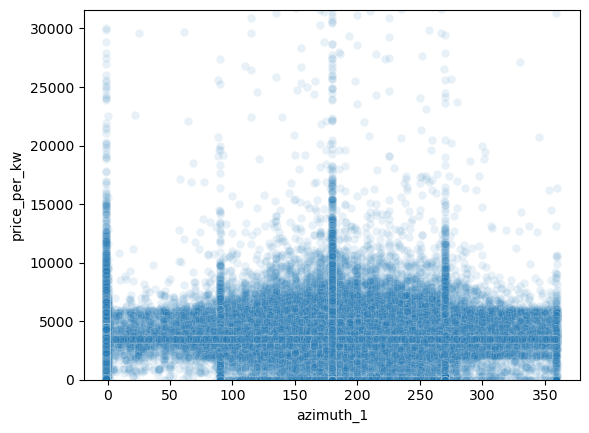

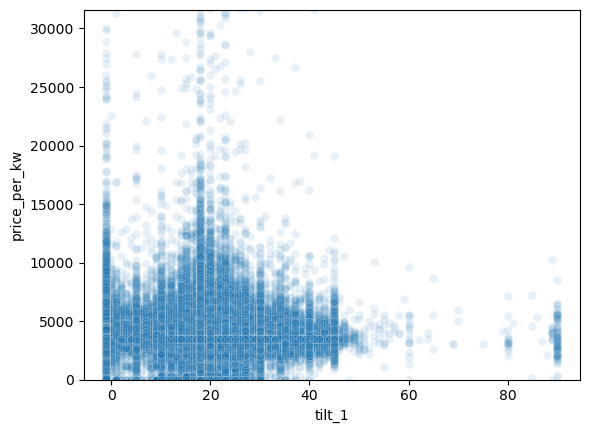

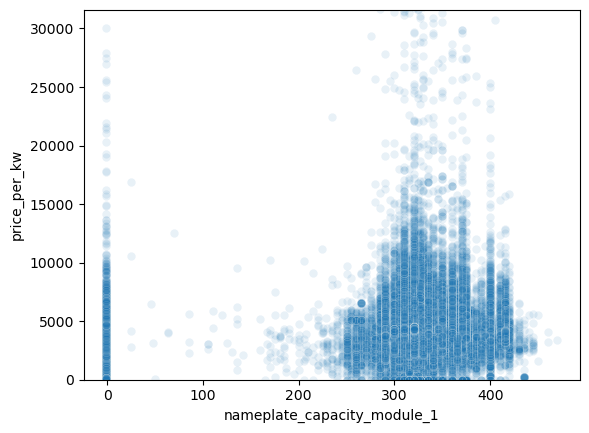

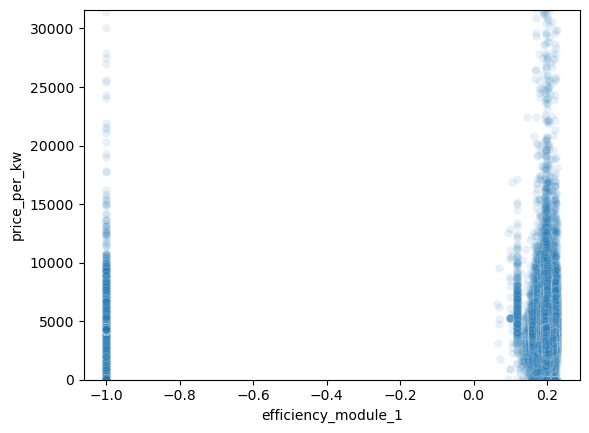

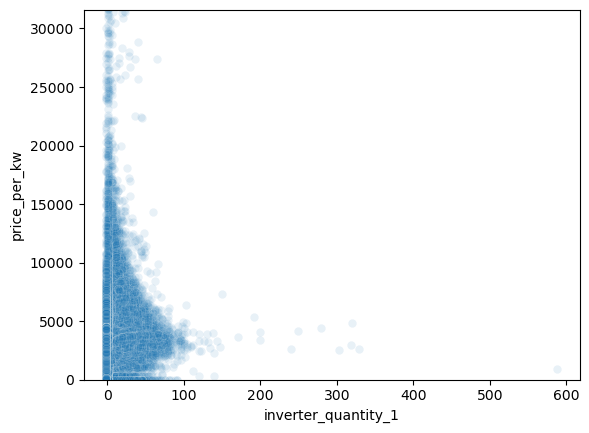

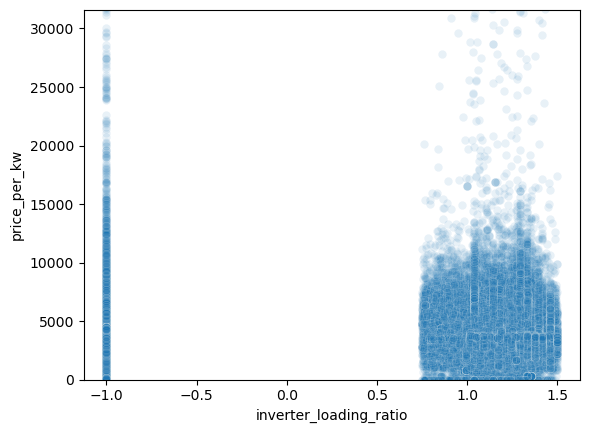

In [36]:
for col in data.select_dtypes('float64').columns:
    if col != 'price_per_kw':
        sns.scatterplot(data=data, x=col, y='price_per_kw', alpha=0.1)
        plt.ylim(0, np.quantile(data['price_per_kw'], 0.9995))
        plt.show()

These give an interesting quick look at the data. I want to dig into a few of them a little more. I'll start with efficiency_module_1 by removing missing values, then plotting with a linear regression to see if there's anything there.

<function matplotlib.pyplot.show(close=None, block=None)>

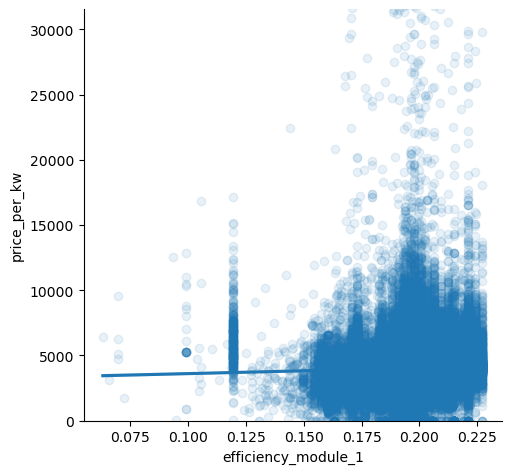

In [32]:
em1_no_null = data[data['efficiency_module_1'] != -1]

sns.lmplot(data=em1_no_null, x='efficiency_module_1', y='price_per_kw', scatter_kws={'alpha': 0.1})
plt.ylim(0, np.quantile(em1_no_null['price_per_kw'], 0.9995))
plt.show

That regression line looks pretty flat, so let's move on to nameplate_capacity_module_1 which had the same problem.

<function matplotlib.pyplot.show(close=None, block=None)>

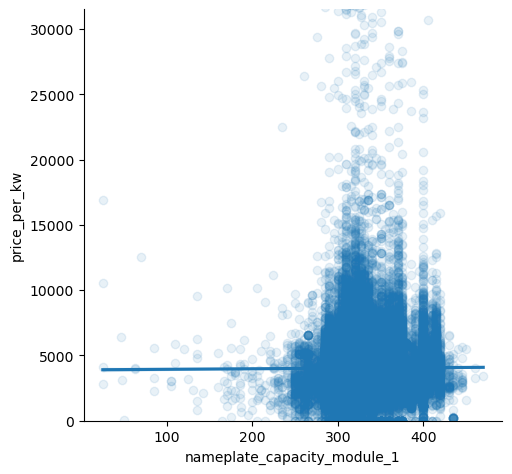

In [33]:
# Nameplate capacity is the maximum output the system can generate

ncm1_no_null = data[data['nameplate_capacity_module_1'] != -1]

sns.lmplot(data=ncm1_no_null, x='nameplate_capacity_module_1', y='price_per_kw', scatter_kws={'alpha': 0.1})
plt.ylim(0, np.quantile(ncm1_no_null['price_per_kw'], 0.9995))
plt.show

This also has a very flat regression line, so I'll leave it there. The last that looks worth checking is inverter_loading_ratio.

<function matplotlib.pyplot.show(close=None, block=None)>

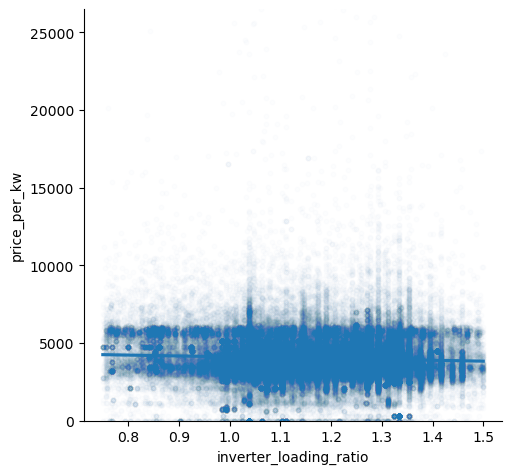

In [40]:
ilr_no_null = data[data['inverter_loading_ratio'] != -1]

sns.lmplot(data=ilr_no_null, x='inverter_loading_ratio', y='price_per_kw', scatter_kws={'alpha': 0.01, 's':10})
plt.ylim(0, np.quantile(ilr_no_null['price_per_kw'], 0.9995))
plt.show

This one is a much more dense plot so it's harder to see the regression line, but it's pretty flat with a slightly negative slope.

### Conclusions
As a final wrap-up of this analysis I'll summarize the findings below.

The mean value of price per KW changes significantly based on the value of the following categorical variables:
* state_TX - negative correlation (Texas installations are on average more cost effective than the rest of the US)
* self_installed - negative correlation (self installed units are more cost effective)
* additional_modules - negative correlation
* bipv_module_1 - positive correlation
* additional_inverters - positive correlation
* solar_storage_hybrid_inverter_1 - positive correlation

